# TIME SERIES FORECASTING

#### Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.

#### Import Libraries

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

#### Read File

In [2]:
df=pd.read_excel(r'TotalSales.xlsx')

In [3]:
df.describe()

,Revenue
count,121317.000000
mean,21402.362873
std,28509.182428
min,1.374000
25%,564.480000
50%,2518.980000
75%,37202.781200
max,163930.394300


In [4]:
df.head()

,OrderDate,Category,Revenue
0,2011-05-31,Clothing,35944.1562
1,2011-07-01,Clothing,32673.0446
2,2011-07-01,Clothing,115696.3313
3,2011-07-01,Clothing,17358.0101
4,2011-07-01,Clothing,52803.4477


In [5]:
Totalsales=df

In [6]:
Totalsales['OrderDate'].min(), Totalsales['OrderDate'].max()

(Timestamp('2011-05-31 00:00:00'), Timestamp('2014-06-30 00:00:00'))

In [7]:
Totalsales.describe()

,Revenue
count,121317.000000
mean,21402.362873
std,28509.182428
min,1.374000
25%,564.480000
50%,2518.980000
75%,37202.781200
max,163930.394300


In [8]:
Totalsales.drop('Category',axis=1,inplace=True)
Totalsales = Totalsales.sort_values('OrderDate')

In [9]:
Totalsales.head()

,OrderDate,Revenue
0,2011-05-31,35944.1562
75776,2011-05-31,35944.1562
62010,2011-05-31,13787.5434
71669,2011-05-31,35944.1562
83435,2011-05-31,20645.6340


#### Data Preprocessing
This step includes removing columns we do not need, check missing values, aggregate sales by date and so on.

#### Indexing with Time Series Data

In [10]:
Totalsales = Totalsales.groupby('OrderDate')['Revenue'].sum().reset_index()

In [11]:
Totalsales = Totalsales.set_index('OrderDate')

In [12]:
Totalsales.index

DatetimeIndex(['2011-05-31', '2011-06-01', '2011-06-02', '2011-06-03',
               '2011-06-04', '2011-06-05', '2011-06-06', '2011-06-07',
               '2011-06-08', '2011-06-09',
               ...
               '2014-06-21', '2014-06-22', '2014-06-23', '2014-06-24',
               '2014-06-25', '2014-06-26', '2014-06-27', '2014-06-28',
               '2014-06-29', '2014-06-30'],
              dtype='datetime64[ns]', name='OrderDate', length=1124, freq=None)

#### Our current datetime data can be tricky to work with, therefore, we will use the averages daily sales value for that month instead, and we are using the start of each month as the timestamp.

In [13]:
y = Totalsales['Revenue'].resample('MS').sum()

In [14]:
y['2012':]

OrderDate
2012-01-01    5.101804e+07
2012-02-01    1.592805e+07
2012-03-01    4.376493e+07
2012-04-01    2.252309e+07
2012-05-01    1.056937e+08
2012-06-01    1.496761e+08
2012-07-01    1.254875e+08
2012-08-01    6.711916e+07
2012-09-01    1.086049e+08
2012-10-01    7.903062e+07
2012-11-01    3.533112e+07
2012-12-01    5.860920e+07
2013-01-01    4.060565e+07
2013-02-01    7.225465e+07
2013-03-01    1.050425e+08
2013-04-01    7.270384e+07
2013-05-01    1.133912e+08
2013-06-01    1.736119e+08
2013-07-01    1.701580e+08
2013-08-01    8.311888e+07
2013-09-01    1.190313e+08
2013-10-01    1.217557e+08
2013-11-01    4.835148e+07
2013-12-01    7.069769e+07
2014-01-01    7.132520e+07
2014-02-01    3.705144e+06
2014-03-01    1.908918e+08
2014-04-01    5.038823e+06
2014-05-01    1.201619e+08
2014-06-01    1.322623e+05
Freq: MS, Name: Revenue, dtype: float64

#### Visualizing Furniture Sales Time Series Data

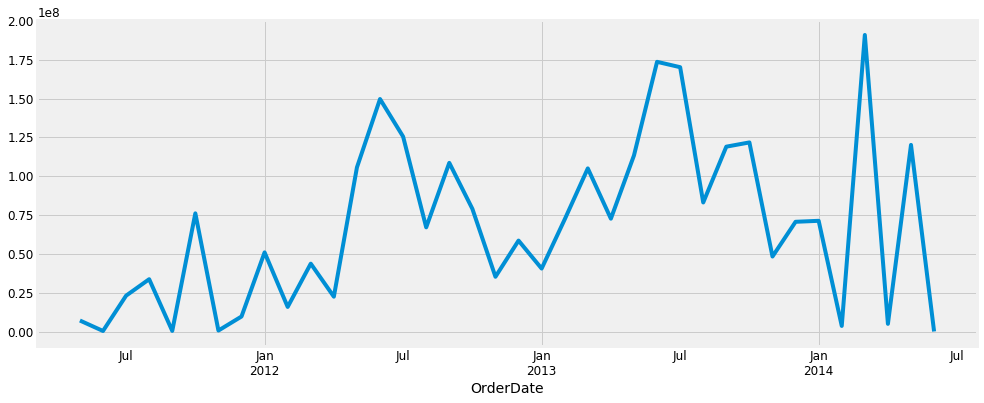

In [15]:
y.plot(figsize=(15, 6))
plt.show()

#### Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern, such as sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year.

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

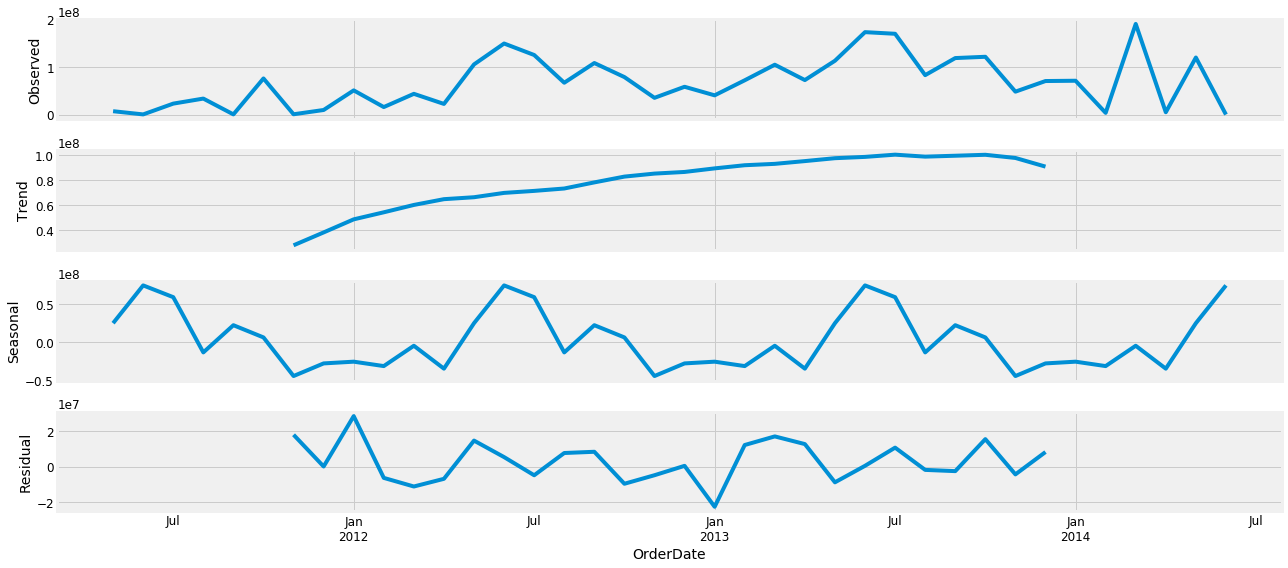

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

#### The plot above clearly shows that the sales of furniture is unstable, along with its obvious seasonality.

#### Time series forecasting with ARIMA
We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:

In [17]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


#### This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model

In [18]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1460.3291071058513
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:24019647074.40001
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:975.3820001798248
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1015.8144633693032
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:976.2445463870882
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:545.766337697037
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1414.3538046343322
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:24019409894.302464


C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:932.1371385686264
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1020.4577052949355
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:941.0182460043952
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:546.7732435361281
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1401.4437098064661
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:942.9988814668498
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:978.7206645974446


C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:515.5699426380913
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1347.5777783031788
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:23782335726.52703
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:891.3067047373668
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:967.0917181616406
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:887.5639496118501
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:511.0147380269881
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1435.6111008024188
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:20954283734.726643
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:972.9477899507381
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:973.9191406314275
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:975.0546396522998
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:507.42907472721197
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1386.76827287975
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:20944968378.07677
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:928.470613810966
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:968.2912034960063


C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:928.0103616906715
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:503.9601889843913
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1383.2630672995576
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:13725096873.879097
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:923.6065541706702
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:921.900516980415
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:922.9132896459844
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:465.3409456352233
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1346.4609881676765
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:13419409076.861109
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:886.9550707365572
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:922.9007415525466
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:879.1533272867497
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:466.8644854302418


C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


#### The above output suggests that SARIMAX(1, 1, 1)x(1, 1, 0, 12) yields the lowest AIC value of 385.32. Therefore we should consider this to be optimal option.

#### Fitting the ARIMA model

In [19]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0014      0.264     -3.791      0.000      -1.519      -0.484
ma.L1         -0.2730      0.436     -0.626      0.531      -1.127       0.581
ar.S.L12       0.3452      0.373      0.926      0.355      -0.386       1.076
sigma2      2.319e+15   1.08e-16   2.14e+31      0.000    2.32e+15    2.32e+15


#### run model diagnostics to investigate any unusual behavior

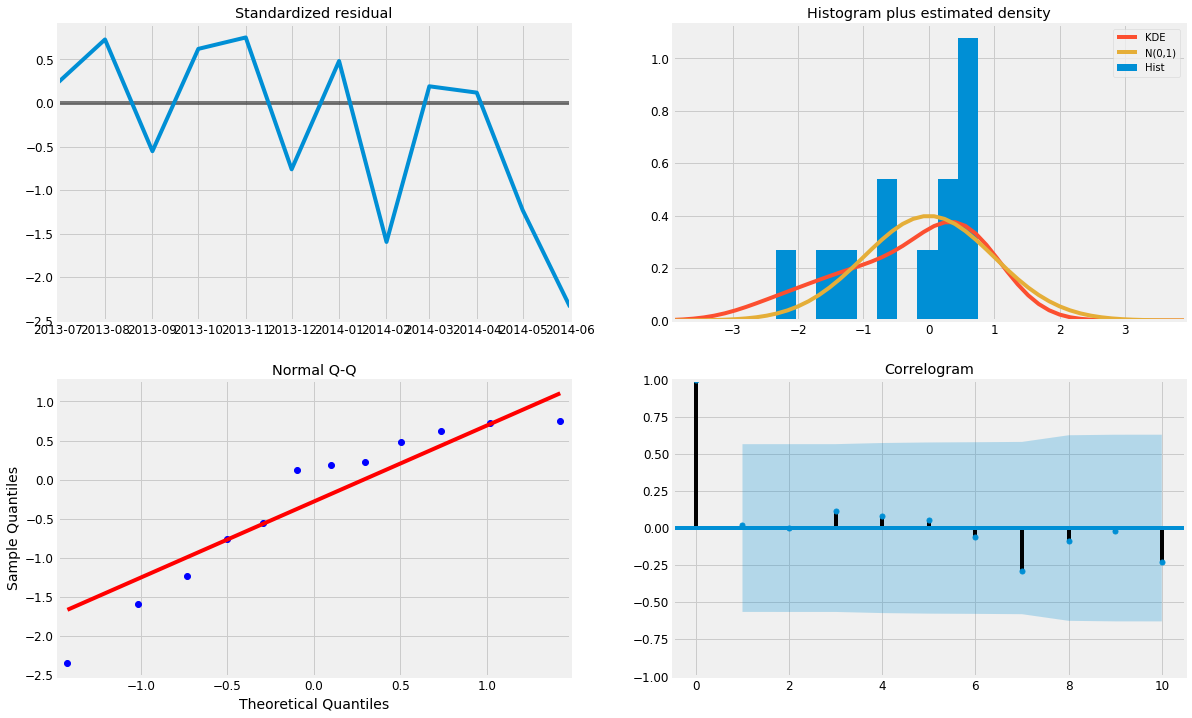

In [20]:
results.plot_diagnostics(figsize=(18, 12))
plt.show()

####  
It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed.

#### Validating forecasts
To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2017–01–01 to the end of the data.

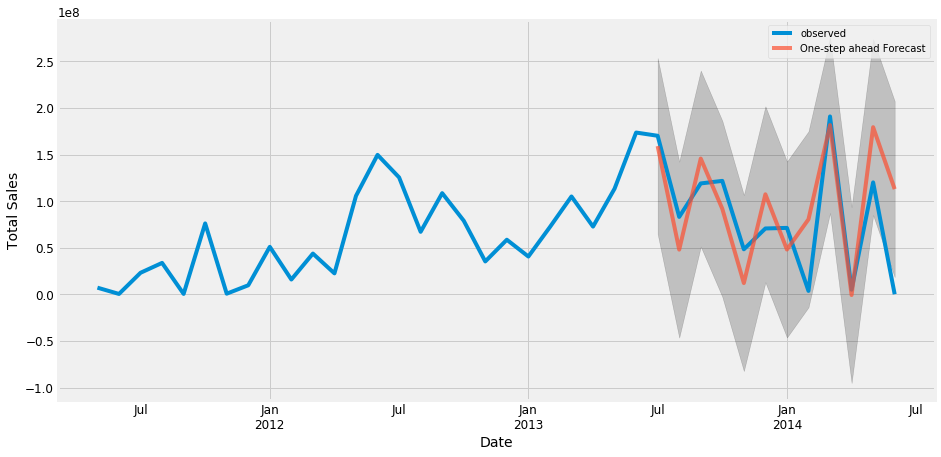

In [21]:
pred = results.get_prediction(start=pd.to_datetime('2013-07-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2011':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Total Sales')
plt.legend()
plt.show()

#### The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.

In [22]:
y_forecasted = pred.predicted_mean
y_truth = y['2013-07-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2367516714736103.5


In [23]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 48657134.26


#### Producing and visualizing forecasts

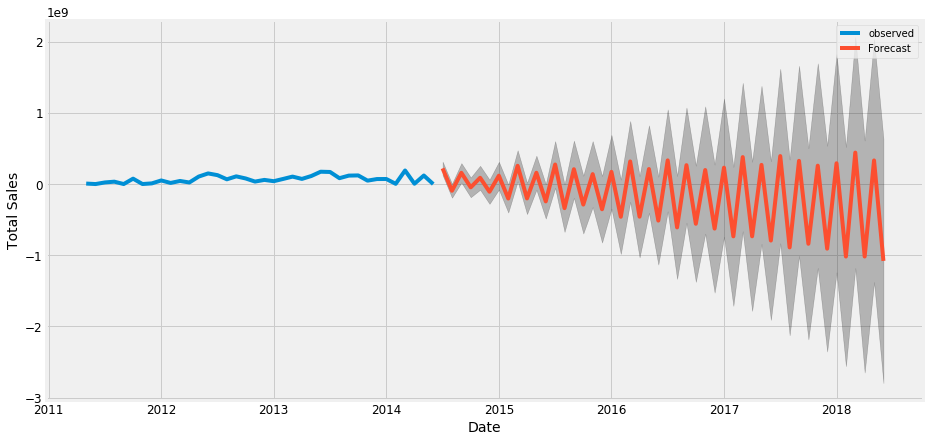

In [24]:
pred_uc = results.get_forecast(steps=48)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Total Sales')
plt.legend()
plt.show()

####  
Our model clearly captured hardware sales seasonality. As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.

# Online Sales

In [25]:
os=pd.read_excel(r'C:\Users\Admin\Desktop\Course Project\Revision\OnlineSales.xlsx')

In [26]:
os.describe()

,Revenue,Cost,Profit
count,58428.000000,58428.000000,58428.000000
mean,501.694094,295.366122,206.327971
std,940.039843,559.324530,383.701678
min,2.290000,0.856500,1.433500
25%,8.990000,3.362300,3.123700
50%,32.600000,12.192400,15.643700
75%,539.990000,343.649600,196.340400
max,3578.270000,2171.294200,1487.835600


In [27]:
os.head()

,CategoryName,OrderDate,Country,Revenue,Cost,Profit
0,Bikes,2010-12-29,United States,699.0982,413.1463,285.9519
1,Bikes,2010-12-29,Canada,3578.2700,2171.2942,1406.9758
2,Bikes,2010-12-29,France,3399.9900,1912.1544,1487.8356
3,Bikes,2010-12-29,United States,3399.9900,1912.1544,1487.8356
4,Bikes,2010-12-29,Australia,3399.9900,1912.1544,1487.8356


In [28]:
Onlinesales=os

In [29]:
Onlinesales['OrderDate'].min(), Onlinesales['OrderDate'].max()

(Timestamp('2010-12-29 00:00:00'), Timestamp('2013-12-31 00:00:00'))

In [30]:
Onlinesales.describe()

,Revenue,Cost,Profit
count,58428.000000,58428.000000,58428.000000
mean,501.694094,295.366122,206.327971
std,940.039843,559.324530,383.701678
min,2.290000,0.856500,1.433500
25%,8.990000,3.362300,3.123700
50%,32.600000,12.192400,15.643700
75%,539.990000,343.649600,196.340400
max,3578.270000,2171.294200,1487.835600


In [31]:
cols = ['CategoryName','Country','Cost','Profit']
Onlinesales.drop(cols,axis=1,inplace=True)
Onlinesales=Onlinesales.sort_values('OrderDate')

In [32]:
Onlinesales.isnull().sum()

OrderDate    0
Revenue      0
dtype: int64

In [33]:
Onlinesales.head()

,OrderDate,Revenue
0,2010-12-29,699.0982
1,2010-12-29,3578.2700
2,2010-12-29,3399.9900
3,2010-12-29,3399.9900
4,2010-12-29,3399.9900


#### Data Preprocessing
This step includes removing columns we do not need, check missing values, aggregate sales by date and so on.

#### Indexing with Time Series Data

In [34]:
Onlinesales = Onlinesales.groupby('OrderDate')['Revenue'].sum().reset_index()

In [35]:
Onlinesales = Onlinesales.set_index('OrderDate')

In [36]:
Onlinesales.index

DatetimeIndex(['2010-12-29', '2010-12-30', '2010-12-31', '2011-01-01',
               '2011-01-02', '2011-01-03', '2011-01-04', '2011-01-05',
               '2011-01-06', '2011-01-07',
               ...
               '2013-12-22', '2013-12-23', '2013-12-24', '2013-12-25',
               '2013-12-26', '2013-12-27', '2013-12-28', '2013-12-29',
               '2013-12-30', '2013-12-31'],
              dtype='datetime64[ns]', name='OrderDate', length=1096, freq=None)

#### Our current datetime data can be tricky to work with, therefore, we will use the sum of sales value for that month instead, and we are using the start of each month as the timestamp.

In [37]:
y = Onlinesales['Revenue'].resample('MS').sum()

In [38]:
y['2012':]

OrderDate
2012-01-01    4.953641e+05
2012-02-01    5.069942e+05
2012-03-01    3.734830e+05
2012-04-01    4.003356e+05
2012-05-01    3.588779e+05
2012-06-01    5.551601e+05
2012-07-01    4.445582e+05
2012-08-01    5.239174e+05
2012-09-01    4.861775e+05
2012-10-01    5.351595e+05
2012-11-01    5.379555e+05
2012-12-01    6.245022e+05
2013-01-01    8.576899e+05
2013-02-01    7.713487e+05
2013-03-01    1.049907e+06
2013-04-01    1.046023e+06
2013-05-01    1.284593e+06
2013-06-01    1.643178e+06
2013-07-01    1.371676e+06
2013-08-01    1.551066e+06
2013-09-01    1.447496e+06
2013-10-01    1.673293e+06
2013-11-01    1.780920e+06
2013-12-01    1.874360e+06
Freq: MS, Name: Revenue, dtype: float64

#### Visualizing Furniture Sales Time Series Data

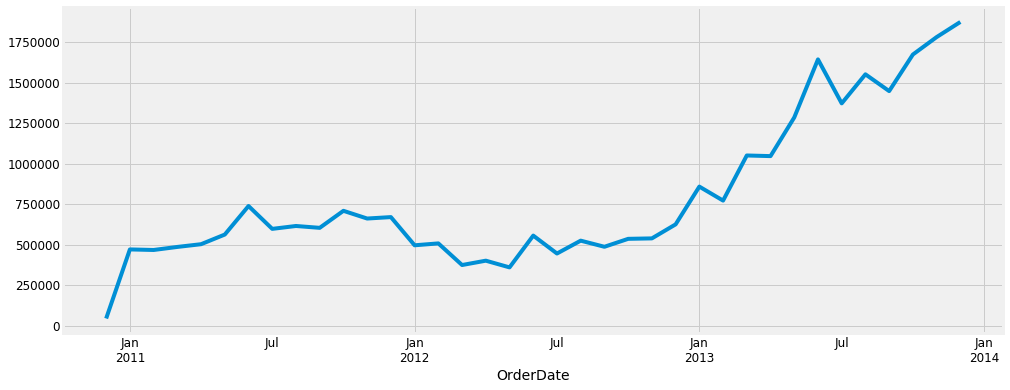

In [39]:
y.plot(figsize=(15, 6))
plt.show()

#### Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern, such as sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year.

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

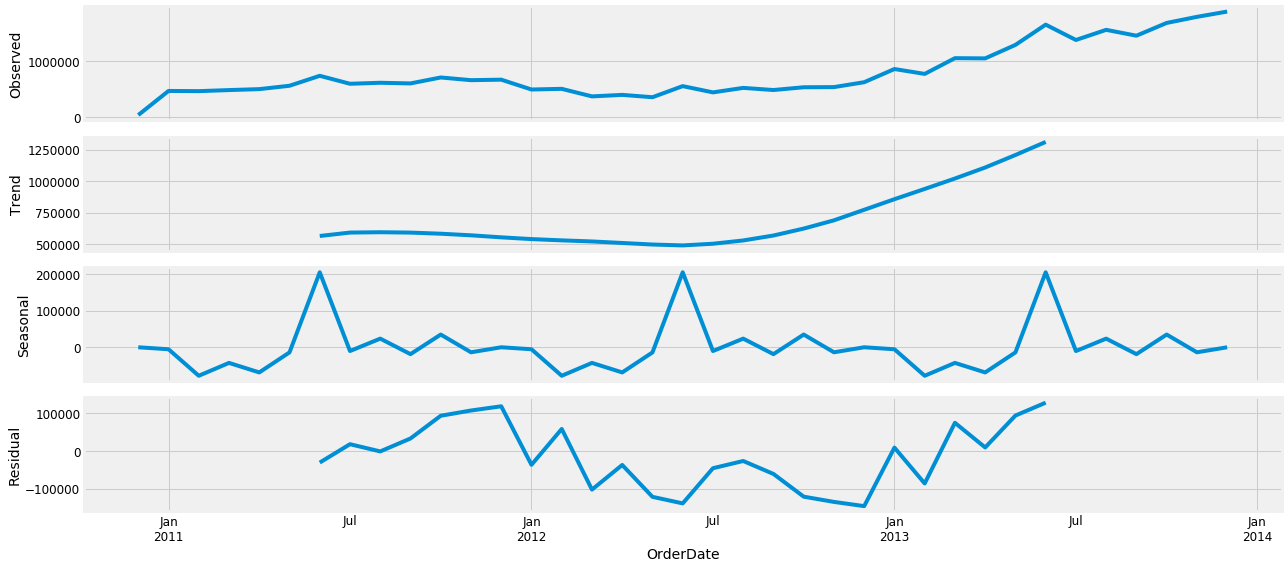

In [40]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

#### The plot above clearly shows that the sales of furniture is unstable, along with its obvious seasonality.

#### Time series forecasting with ARIMA
We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:

In [41]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


#### This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model

In [42]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1093.4261548131874
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:715.6868614421069
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:737.6536505336713
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:392.9745219598748
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1043.6945911169128
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:4050483.3268012516
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:671.5066874315158

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:744.7154168956743
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:684.0741571037662
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:382.57396519826744
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:932.0436703723354
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:618.3290419501967
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:647.883147306718
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:323.6686425690821
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:906.8840127201837
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:594.3917590816602
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:649.6920695790357
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:325.853007260811
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:964.7183462498197
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:250458.2657264361
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:657.5973473536665
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:647.47595220535
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:644.806507468067
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:326.5225627104871
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:928.2065064202881
ARIMA(1, 0, 1

#### The above output suggests that SARIMAX(1, 1, 1)x(1, 1, 0, 12) yields the lowest AIC value of 385.32. Therefore we should consider this to be optimal option.

#### Fitting the ARIMA model

In [43]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5302      3.038     -0.174      0.861      -6.485       5.425
ma.L1          0.6003      2.783      0.216      0.829      -4.854       6.055
ar.S.L12      -1.6980      1.041     -1.631      0.103      -3.738       0.342
sigma2      2.766e+10   8.25e-11   3.35e+20      0.000    2.77e+10    2.77e+10


#### run model diagnostics to investigate any unusual behavior

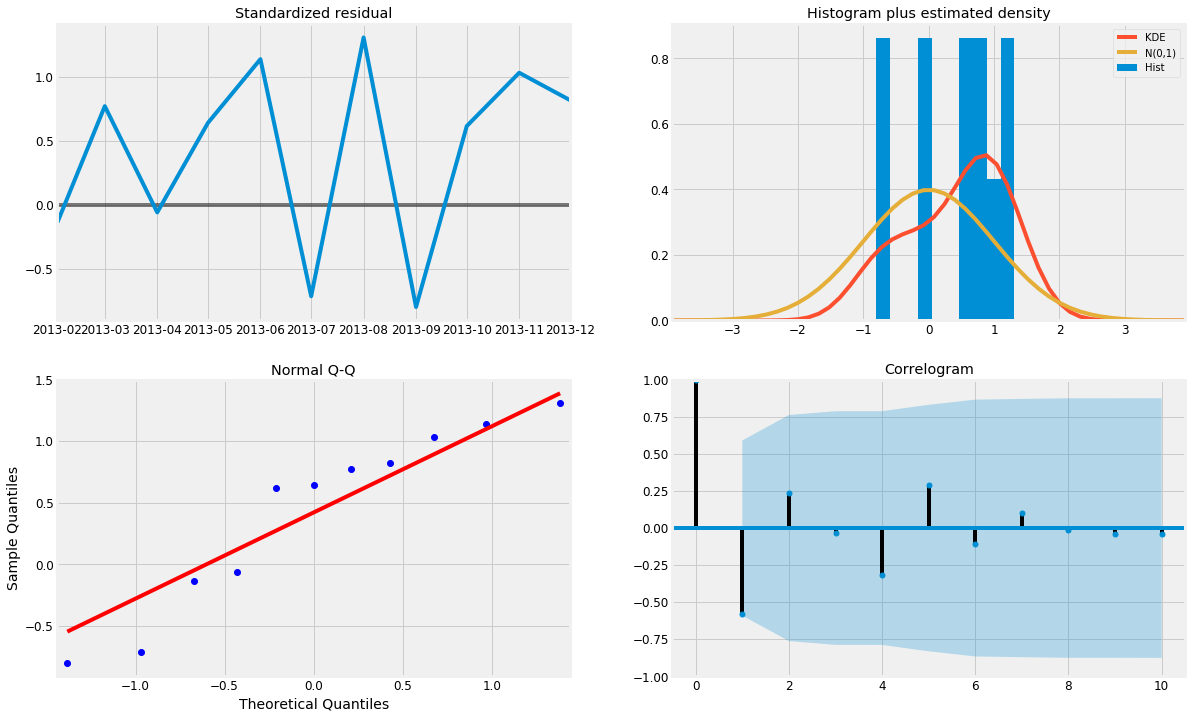

In [44]:
results.plot_diagnostics(figsize=(18, 12))
plt.show()

####  
It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed.

#### Validating forecasts
To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2017–01–01 to the end of the data.

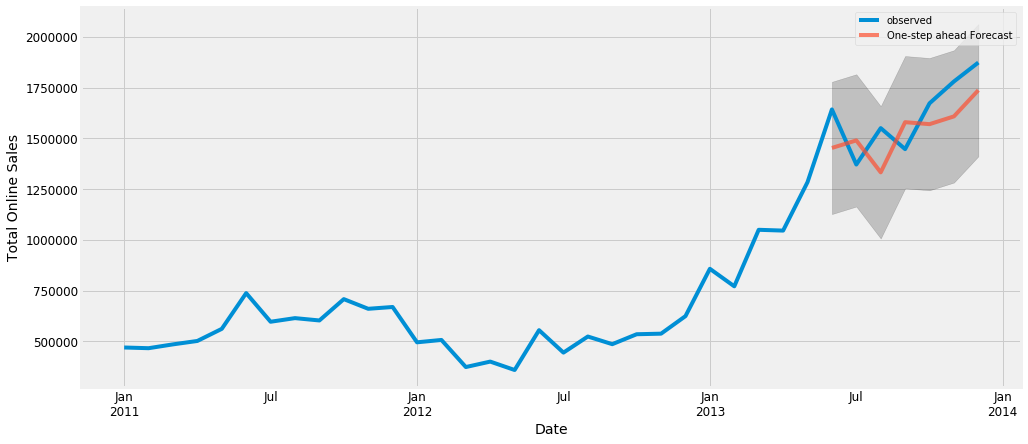

In [45]:
pred = results.get_prediction(start=pd.to_datetime('2013-06-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2011':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(15, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Total Online Sales')
plt.legend()
plt.show()

#### The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.

In [46]:
y_forecasted = pred.predicted_mean
y_truth = y['2013-06-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 24874223385.68


In [47]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 157715.64


#### Producing and visualizing forecasts

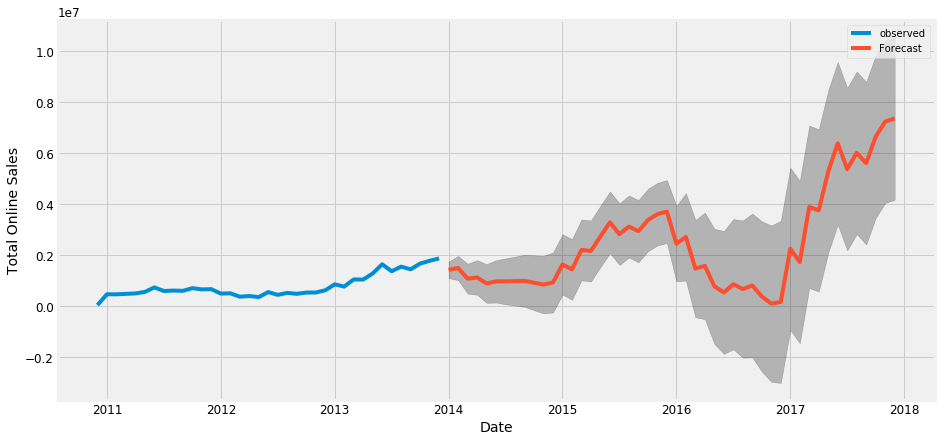

In [48]:
pred_uc = results.get_forecast(steps=48)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Total Online Sales')
plt.legend()
plt.show()

####  
Our model clearly captured hardware sales seasonality. As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.